In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv('tim_data/element_sim.csv')
experimental = pd.read_excel('tim_data/experimental_values.xlsx')
df.head()

,MG,C,MN,NA,S,CA,CO,H,FE,CU,NI,N,O,R,ZN,K,SE,MO,P
0,247420,1842592,62054,883,264274,11956,1125,3480,205431,4232,9859,408469,973465,64652,166087,15907,19,2194,135989
1,247402,1843049,62060,883,264291,11959,1125,3480,205451,4232,9859,408576,973719,64648,165798,15911,19,2194,136025
2,247434,1843511,62073,883,264324,11959,1125,3471,205476,4232,9860,408690,973970,64660,165662,15915,19,2195,136059
3,247487,1843836,62089,884,264369,11962,1125,3468,205508,4233,9862,408751,974158,64676,165545,15920,19,2196,136085
4,247566,1844203,62113,884,264422,11962,1125,3465,205541,4233,9864,408834,974356,64700,165648,15926,19,2198,136111


/Users/timjing/.pyenv/versions/3.10.12/envs/viv-ecoli/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/timjing/.pyenv/versions/3.10.12/envs/viv-ecoli/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


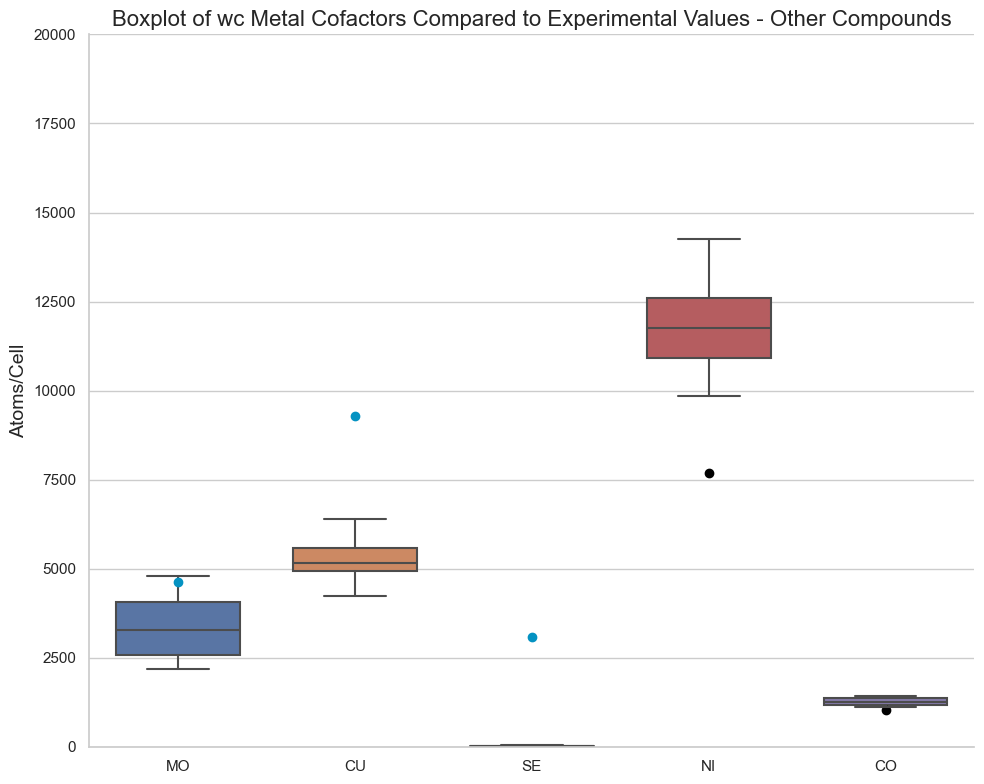

In [7]:
# Boxplot for element concentrations < 10,000
classification_dict = {"Non-reactive": ["K", "MG", "CA", "NA"], "Transition": ["MN", "FE", "CO", "CU", "ZN", "NI", "MO"], "Metalloid": ["S", "SE"], "Transition Updated": ["FE", "ZN", "MN", "MO", "CU", "SE", "NI", "CO"], "Other Compounds": ["MO", "CU", "SE", "NI", "CO"]}
classifications = [# "Non-reactive", "Transition", "Metalloid", "Transition Updated", 
                   "Other Compounds"]
exclude = ["C", "H", "O", "P", "N"]

for classification in classifications:
    sns.set(style='whitegrid')

    fig, ax = plt.subplots(figsize=(10,8))
    g1 = sns.boxplot(data=df.loc[:, classification_dict[classification]], width=0.7)
    plt.title(f"Boxplot of wc Metal Cofactors Compared to Experimental Values - {classification}", fontsize=16)
    plt.ylabel("Atoms/Cell", fontsize=14)
    # plt.ylim([0, 600000])
    plt.ylim([0, 20000])
    
    index = 0
    for element in classification_dict[classification]:
        if not experimental[element].empty:
            y = experimental[element].values[0]
            if experimental[element].values[3] != "":
                LOD = experimental[element].values[3]
            if experimental[element].values[1] != "":
                y_error = y - experimental[element].values[1]
            ax.errorbar(index, y, yerr=y_error, fmt='o', color='#0492C2')
            ax.scatter(index, LOD, marker='o', color='black')
            index += 1
    
    sns.despine(top=True, right=True, left=True, bottom=False)
    sns.despine()
    plt.tight_layout()
    plt.savefig(f'tim_data/figures/boxplot_{classification}.png', dpi=300)
    plt.show()
                

/Users/timjing/.pyenv/versions/3.10.12/envs/viv-ecoli/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/timjing/.pyenv/versions/3.10.12/envs/viv-ecoli/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


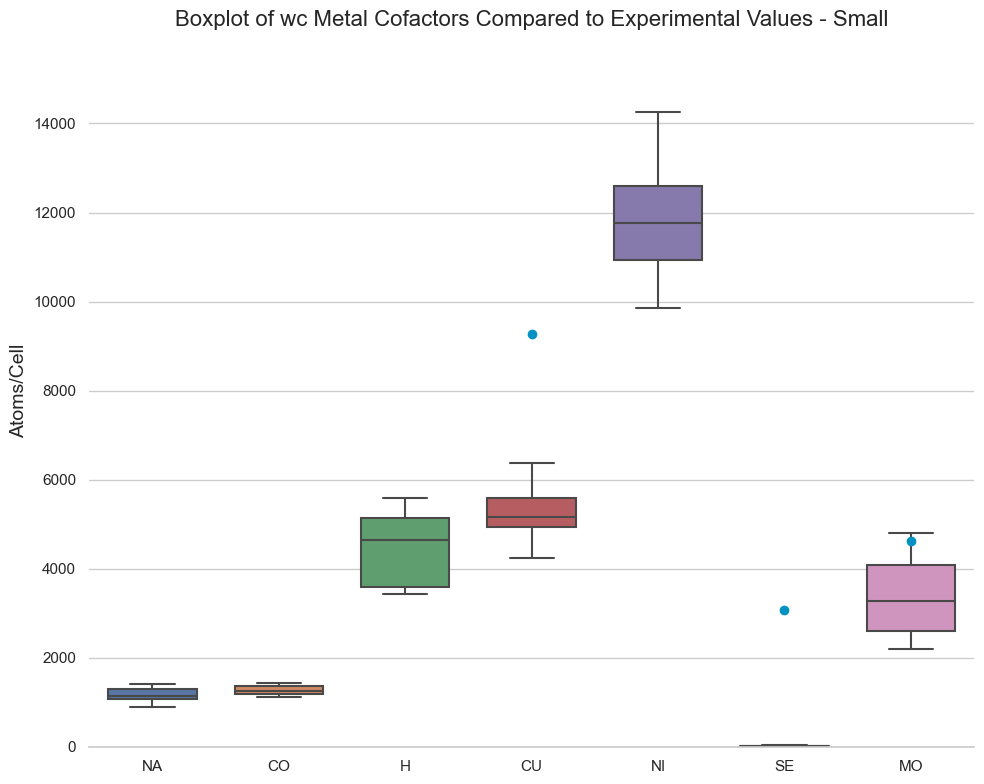

In [14]:
name = "boxplot_1e4"
sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(10,8))
g1 = sns.boxplot(data=df.loc[:, (df < 1e4).any()], width=0.7)
plt.title("Boxplot of wc Metal Cofactors Compared to Experimental Values - Small", fontsize=16)
plt.ylabel("Atoms/Cell", fontsize=14)
plt.ylim([0, 16000])
plt.yticks(np.arange(0, 16000, 2000))

index = 0
for column in df.loc[:, (df < 1e4).any()].columns:
    if not experimental[column].empty:
        y = experimental[column].values[0]
        if experimental[element].values[1] != "":
            y_error = y - experimental[element].values[1]
        ax.errorbar(index, y, yerr=y_error, fmt='o', color='#0492C2')
    index += 1

sns.despine(top=True, right=True, left=True, bottom=False)
plt.tight_layout()

plt.savefig(f'tim_data/figures/{name}.png', dpi=300)
plt.show()


/Users/timjing/.pyenv/versions/3.10.12/envs/viv-ecoli/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/timjing/.pyenv/versions/3.10.12/envs/viv-ecoli/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


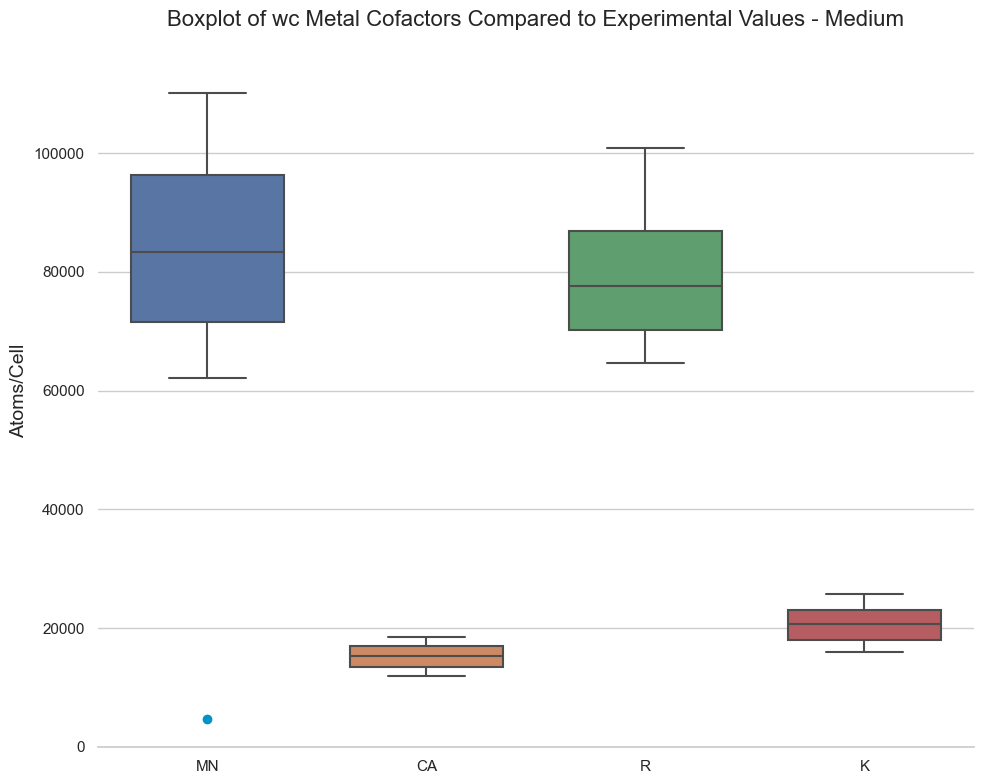

In [15]:
name = "boxplot_1e5"
sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(10,8))
g2 = sns.boxplot(data=df.loc[:, ((df >= 1.5e4) & (df < 1e5)).any()], width=0.7)
plt.title("Boxplot of wc Metal Cofactors Compared to Experimental Values - Medium", fontsize=16)
plt.ylabel("Atoms/Cell", fontsize=14)
plt.ylim([0, 120000])
plt.yticks(np.arange(0, 120000, 20000))

index = 0
for column in df.loc[:, ((df >= 1.5e4) & (df < 1e5)).any()].columns:
    y = experimental[column].values[0]
    if experimental[element].values[1] != "":
        y_error = y - experimental[element].values[1]
    ax.errorbar(index, y, yerr=y_error, fmt='o', color='#0492C2')
    index += 1

sns.despine(top=True, right=True, left=True, bottom=False)
plt.tight_layout()
plt.savefig(f'tim_data/figures/{name}.png', dpi=300)
plt.show()

/Users/timjing/.pyenv/versions/3.10.12/envs/viv-ecoli/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/timjing/.pyenv/versions/3.10.12/envs/viv-ecoli/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


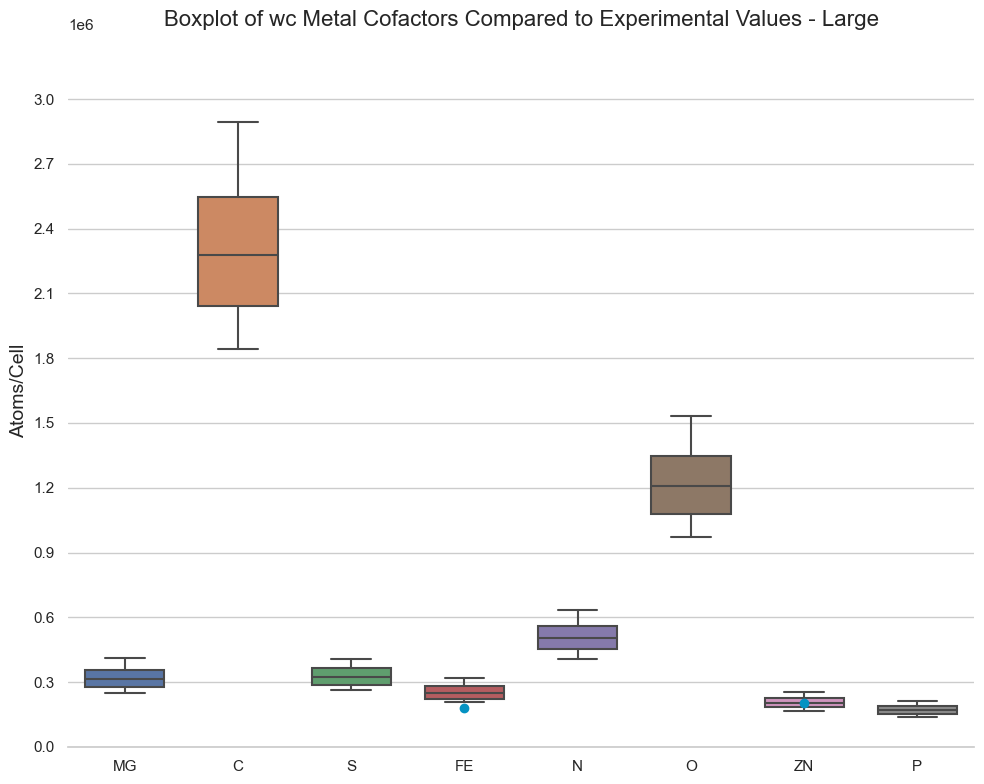

In [16]:
name = "boxplot_1e6"
sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(10,8))
g3 = sns.boxplot(data=df.loc[:, ((df >= 1.2e5) & (df < 2e6)).any()], width=0.7)
plt.title(f"Boxplot of wc Metal Cofactors Compared to Experimental Values - Large", fontsize=16)
plt.ylabel("Atoms/Cell", fontsize=14)
plt.ylim([0, 3.3e6])
plt.yticks(np.arange(0, 3.3e6, 3e5))

index = 0
for column in df.loc[:, ((df >= 1.2e5) & (df < 2e6)).any()].columns:
    y = experimental[column].values[0]
    if experimental[element].values[1] != "":
        y_error = y - experimental[element].values[1]
    ax.errorbar(index, y, yerr=y_error, fmt='o', color='#0492C2')
    index += 1

sns.despine(top=True, right=True, left=True, bottom=False)
plt.tight_layout()
plt.savefig(f'tim_data/figures/{name}.png', dpi=300)
plt.show()

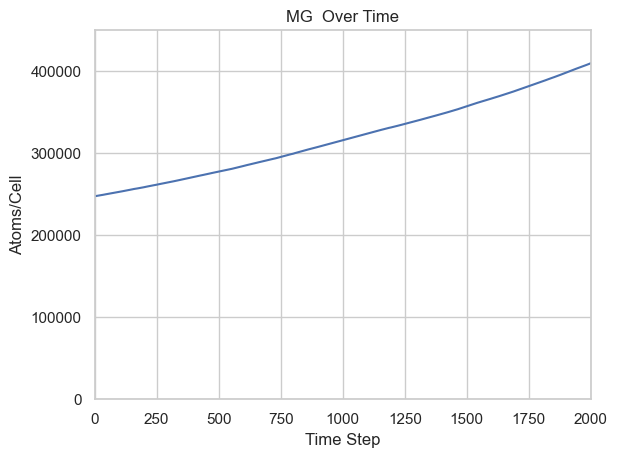

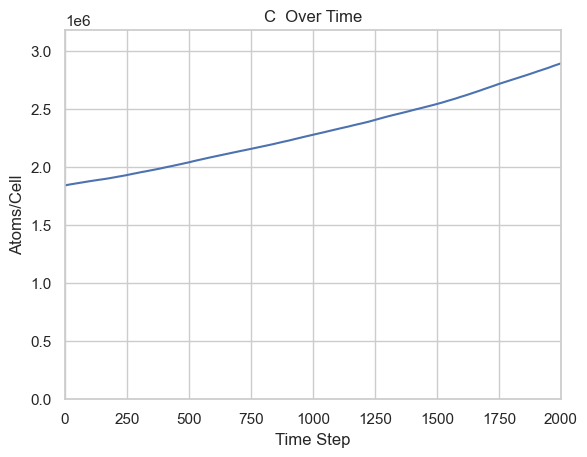

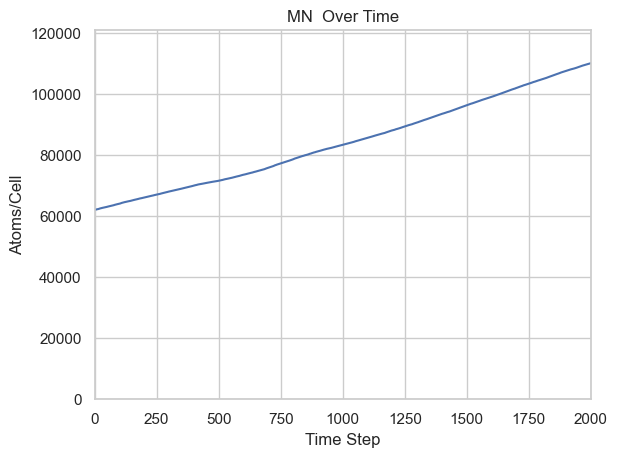

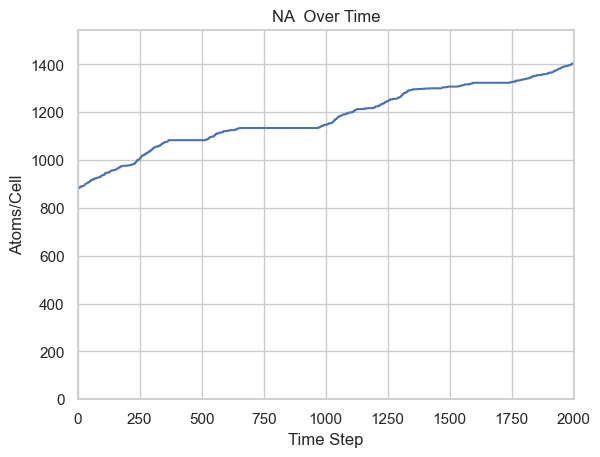

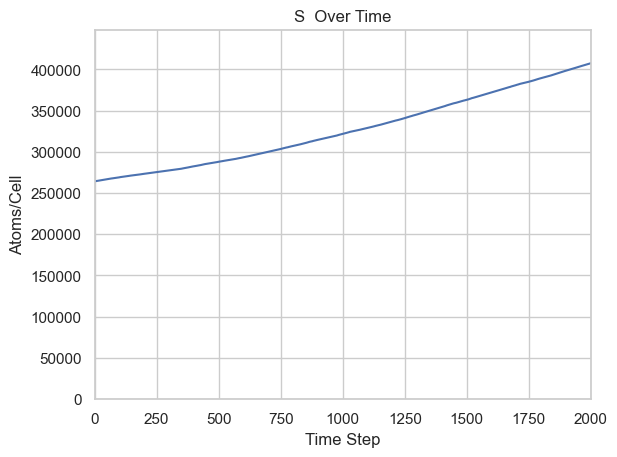

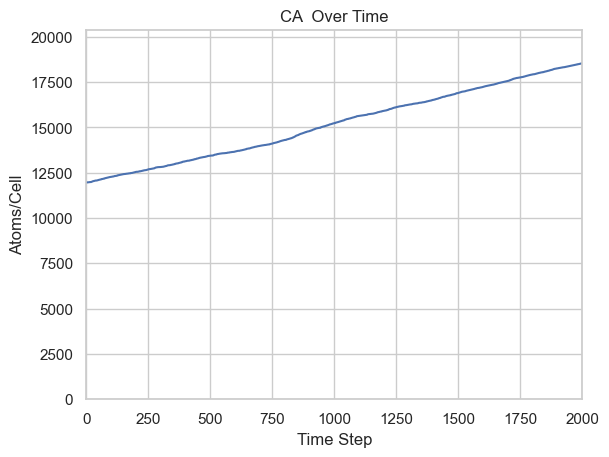

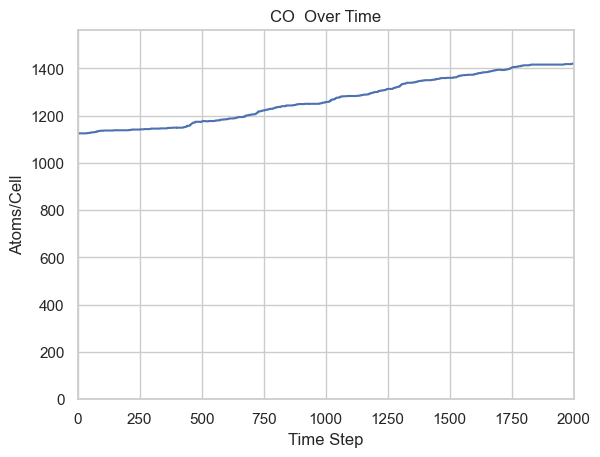

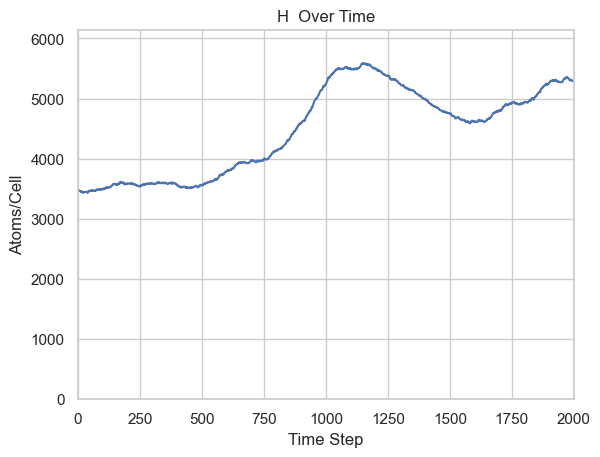

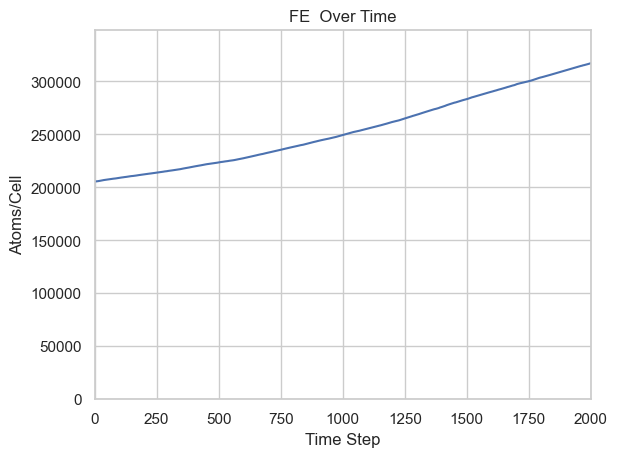

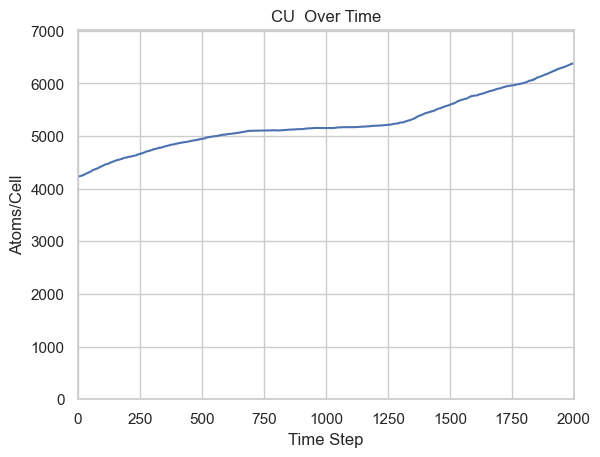

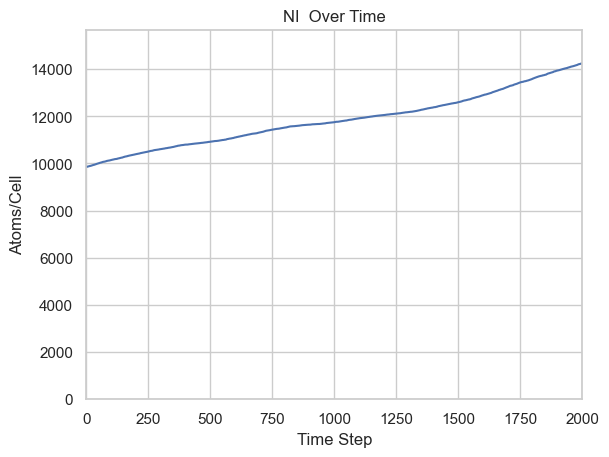

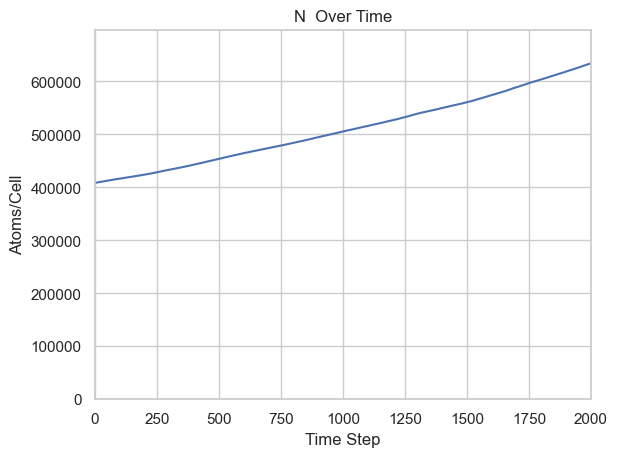

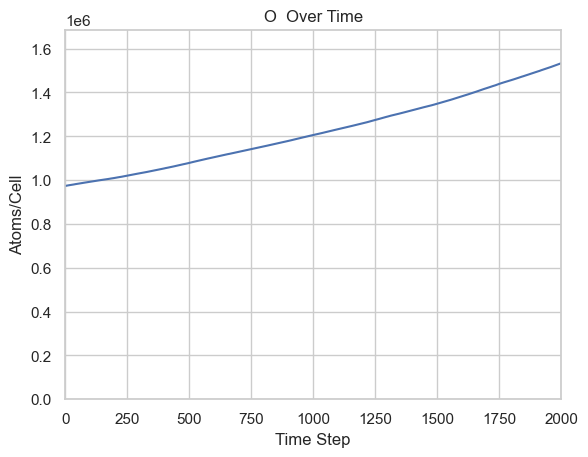

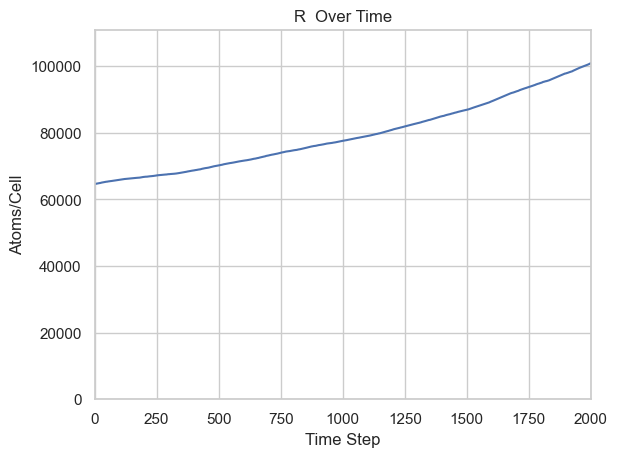

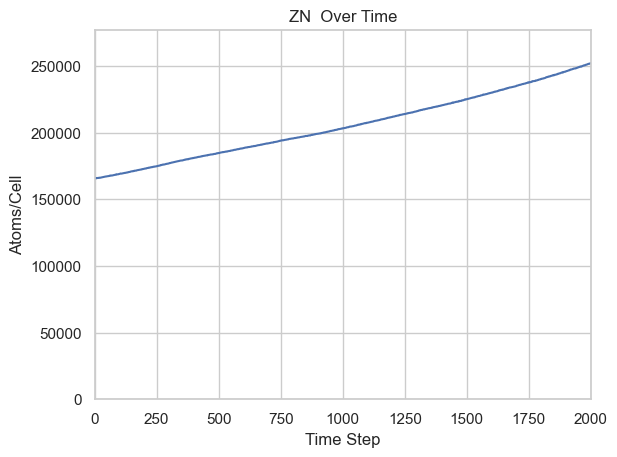

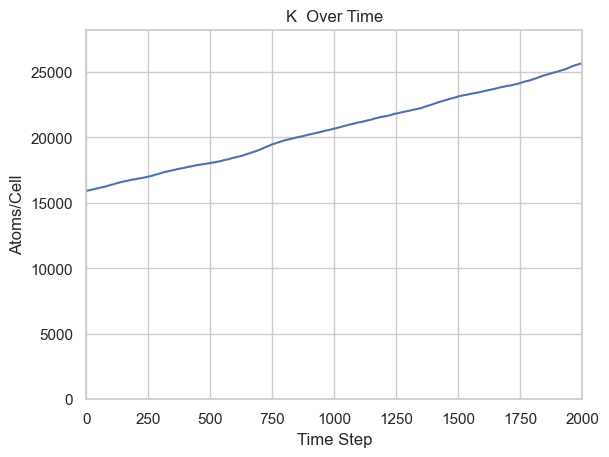

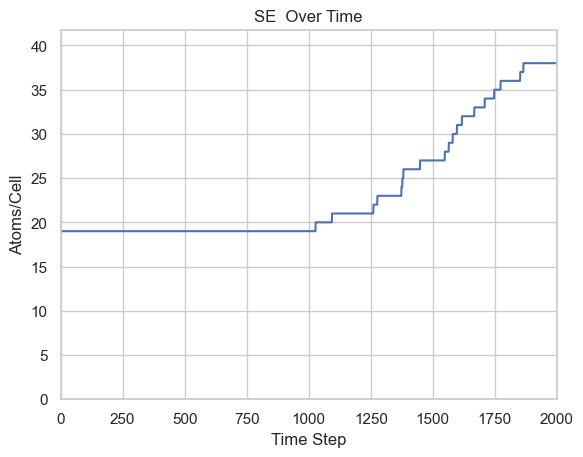

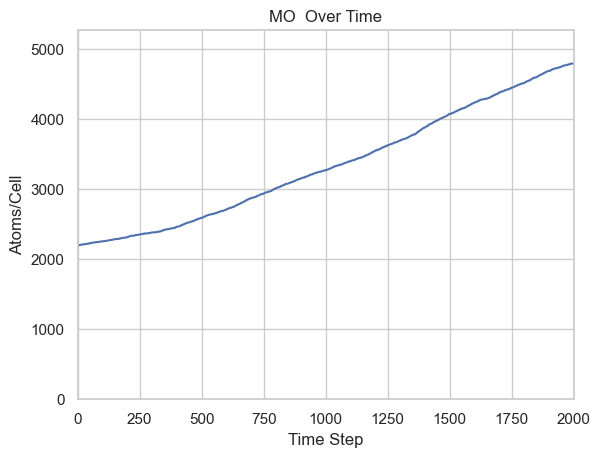

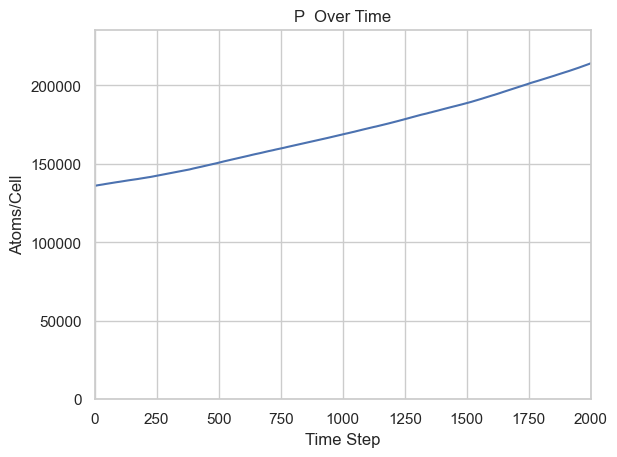

In [17]:
for (columnName, columnData) in df.items():
    x = range(1, len(columnData) + 1)
    sns.lineplot(x = x, y = columnData, data = df)
    plt.ylabel("Atoms/Cell")
    plt.xlabel("Time Step")
    plt.ylim(0, max(columnData) + 0.1*max(columnData))
    plt.xlim(0, 2000)
    plt.title(f"{columnName}  Over Time")    
    
    plt.savefig(f'tim_data/figures/{columnName}_over_time.png', dpi=300)
    plt.show()